In [1]:
import numpy as np

In [2]:
### 농어 길이(독립변수)
perch_length = np.array(
                                [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
                                 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
                                 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
                                 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
                                 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
                                 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
                                 )

### 농어 무게(종속변수)
perch_weight = np.array(
                                [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
                                 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
                                 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
                                 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
                                 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
                                 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                                 1000.0, 1000.0]
                                 )

In [3]:
perch_length.shape, perch_weight.shape

((56,), (56,))

In [8]:
### 훈련 및 테스트 데이터로 분리하기
# 75 : 25의 비율로 분류하기
# 변수는 기존에 사용한 변수명과 동일하게...
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42, test_size = 0.25)
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(42,) (14,) (42,) (14,)


In [10]:
### 훈련 및 테스트 데이터 중에 독립변수는 2차원으로 만들어야함
# - 훈련 시 모델들이 사용하는 차원은 2차원
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
train_input.shape, test_input.shape

((42, 1), (14, 1))

In [31]:
### 훈련모델 생성하기
#    - 이웃의 갯수는 우리가 확인한 3개의 이웃 사용
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors=3)

### 훈련시키기
kn.fit(train_input, train_target)

### 예측하기
#     - 예측에 사용할 길이 값 = 50 사용
kn.predict([[50]])

array([1033.33333333])

In [33]:
### 이웃 3개 구하기
distances, indexes = kn.kneighbors([[50]])

In [ ]:
### 산점도 시각화하기
# - 훈련데이터, 이웃 3개, 예측값 모두 시각화 표현하기

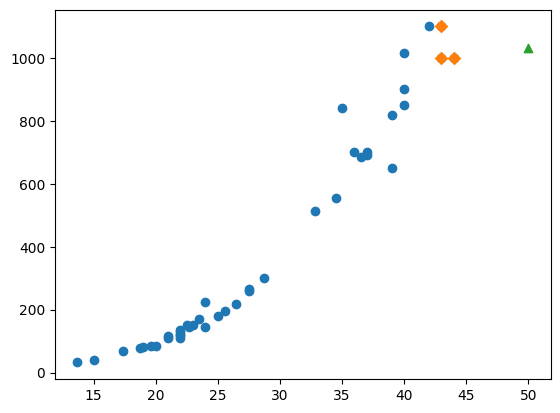

In [35]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker="D")
plt.scatter(50, 1033, marker="^")
plt.show()

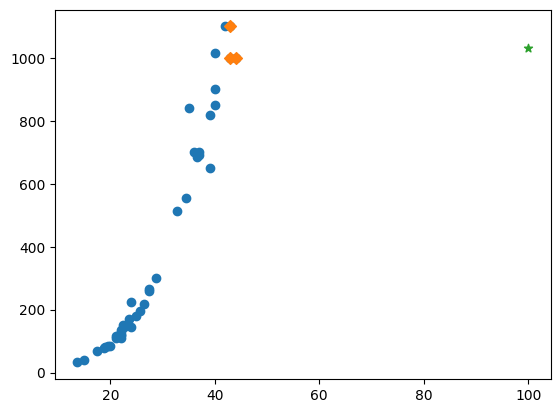

In [38]:
### 예측값의 길이를 100으로 해서 예측한 후 시각화 해주세요
kn.predict([[100]])
distances, indexes = kn.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker="D")
plt.scatter(100, 1033, marker="*")
plt.show()

In [39]:
### 기억하기
"""
(해석) KNN 모델의 한계
 - 독립변수의 값이 커질수록, 종속변수의 값이 같아지는 현상이 발생하는 시점이 나타남
 - 최근접이웃 모델의 특성상 가장 가까운 이웃만 찾기 때문에 나타나는 현상으로,
 - 훈련모델에 적용한 독립변수의 범위 내에 값들은 잘 예측할 수 있으나,
 - 훈련모델에 적용한 독립변수의 범위 이상의 값들을 예측할 경우에는 사용하면 안됩니다.
 
(한계를 극복하기 위한 모델)
 - 회귀의 경우 : 선형회귀모델의 (선형, 다항, 다중회귀모델)을 사용
 - 분류의 경우 : 별도의 분류모델
                     (의사결정나무, 로지스틱레그레이션, 랜덤포레스트, 그레디언트부스트, 히스토그램그레디언트부스트 등등) 사용
                     
<머신러닝에서 주로 사용되는 모델>
 * 회귀모델
 <지도학습 모델>
  - 선형회귀(직선, 1개 특성), 다항회귀(곡선), 다중회귀(직선, 여러 개의 특성)
  
 * 분류모델
 <지도학습 모델>
  - 일반모델 : 의사결정나무, 로지스틱레그레이션
  - 앙상블모델 : 랜덤포레스트, 그레디언트부스트, 히스토그램그레디언트부스트
  <비지도학습 모델>
  - 클러스터링모델 : k-Means
"""

'\n\n'

# 선형회귀모델(Linear Regression Model)

In [ ]:
"""
- 널리 사용되는 대표적인 회귀 모델
- 비교적 간단하며, 성능이 뛰어나기 때문에 회귀모델 수행 시 처음에 하면 좋습니다.
- 선형회귀모델의 특징 : 독립변수(특성)이 1개인 경우 진행합니다.

<훈련에 사용되는 함수>
 - 훈련모델 패키지 : sklearn.linear_model
 - 훈련모델(클래스) : LinearRegression
                          : 선형/다항/다중 회귀모델 모두 동일한 훈련모델 사용함
                          : 데이터의 성격이 다를 뿐임
 - 사용되는 알고리즘(선형회귀 알고리즘) y = ax + b
   ( y : 예측하고자 하는 값
     a : 기울기(또는 일반적으로 "계수"라고 칭함)
     x : 독립변수(훈련데이터)
     b : y절편 값)
 - 모델 훈련 시에 a값과 b값을 알아서 추출해 줍니다.
 - 훈련 : fit()
 - 정확도(결정계수) : score()
 - 예측 : predict()
"""

In [40]:
### 사용하는 회귀모델 패키지 불러들이기
from sklearn.linear_model import LinearRegression

In [41]:
### 회귀모델(클래스) 생성하기
lr = LinearRegression()
lr

LinearRegression()

In [43]:
### 훈련시키기
lr.fit(train_input, train_target)

LinearRegression()

In [44]:
### 예측하기
# - KNN에서 예측에 사용했던 길이 50을 사용
lr.predict([[50]])

array([1241.83860323])

In [46]:
### 직선의 방정식 : y = ax + b
# a : 기울기(계수)
# b : y절편

### 기울기 확인하기
print("기울기(계수) a : ", lr.coef_)
print("y절편 b : ", lr.intercept_)

기울기(계수) a :  [39.01714496]
y절편 b :  -709.0186449535474


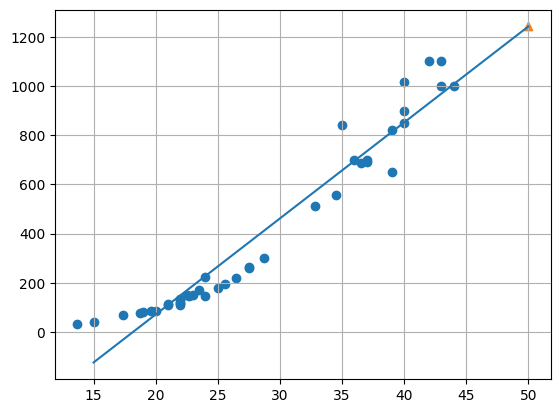

In [49]:
### 시각화하기
### 회귀 모델은 추세선을 이용해서 예측이 잘되는지 확인 가능
# - 추세선 : 기울기와 절편을 적용해서 예측값까지의 선을 그리게 되는데 이 때 선을 추세선이라고 칭합니다.

### 훈련데이터 산점도 시각화
plt.scatter(train_input, train_target)

### 예측하고자 하는 값의 산점도 시각화
plt.scatter(50, 1241.8, marker="^")

### 추세선 그리기
# - 추세선은 x축 값의 시작값부터 끝값까지의 값을 이용해서 직선의 방정식을 완성해서 그리게 됩니다.
plt.plot([15, 50], [lr.coef_*15+lr.intercept_, lr.coef_*50+lr.intercept_])

plt.grid()
plt.show()

### (해석)
# - 추세선에 가까운 데이터(산점)들이 많을수록 좋으며, 추세선에서 떨어진 거리가 오차평균 입니다.
# - 예측값이 추세선에 닿아있다면, 예측이 잘됐다고 판단하면 됩니다.

In [52]:
### 훈련모델의 성능을 평가 중 과대/과소적합 확인은 필수
train_score = lr.score(train_input, train_target)
test_score = lr.score(test_input, test_target)
print(round(train_score, 3)) 
print(round(test_score, 3))

### (해석)
# - 훈련 및 테스트의 정확도(결정계수)의 차이는 약 0.12 정도로, 훈련의 정확도가 높게 나왔기 때문에 과소적합은 일어나지 않으나,
#   테스트의 정확도와의 차이가 10% 이상 나기 때문에 과대 적합을 의심할 수 있음(훈련 정확도가 조금 높게 나온 편임)

### (과대 적합 의심)
# - 회귀모델의 경우, 산점도에서 곡선을 띄는 부분이 있는지 확인
# - 데이터의 양이 적은 경우에도 발생함
# - 기타 다양한 원인(특성이 작은 경우)이 있을 수 있음

0.94
0.825


In [ ]:
"""
<산점도의 특징>
 - 왼쪽 하단 시작부분은 곡선을 나타냄
 - 왼쪽 하단을 따라 추세선을 직선으로 긋는다고 생각했을 때
   -- 무게가 0g 이하로 내려가는 추세선이 그려집니다.(y절편에 따름)
   -- 현실적으로 무게가 0g 이하인 데이터는 없습니다.
   -- 즉, 이 모델로 예측했을 때 무게가 음수(-)가 나올 가능성도 있다는 의미
"""

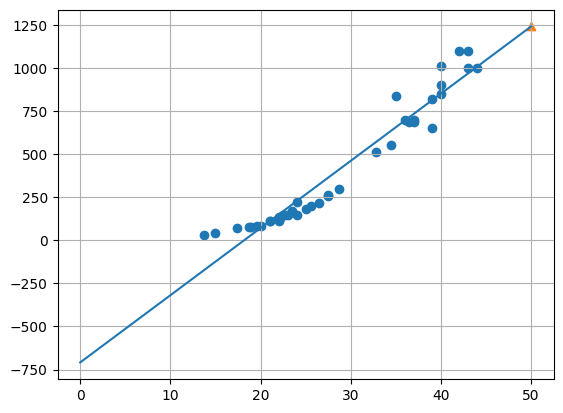

In [53]:
### 훈련데이터 산점도 시각화
plt.scatter(train_input, train_target)

### 예측하고자 하는 값의 산점도 시각화
plt.scatter(50, 1241.8, marker="^")

### 추세선 그리기
# - 추세선은 x축 값의 시작값부터 끝값까지의 값을 이용해서 직선의 방정식을 완성해서 그리게 됩니다.
plt.plot([0, 50], [lr.coef_*0+lr.intercept_, lr.coef_*50+lr.intercept_])

plt.grid()
plt.show()

# 다항회귀모델(곡선의 방정식 사용)

In [ ]:
[[x1], [x2], [], ...]
[[x1^2, x1], [x2^2, x2], ...]

In [ ]:
### train_input 및 test_input에 있는 각 컬럼의 x값에 추가하여 x^2 값도 만들어야함
# - 변수명 : train_poly, test_poly 변수 사용
# - 제곱 연산 방법 예시(3^2) = 3 ** 2 = 9
# - [[제곱값, 원래값], [제곱값, 원래값], ...]
# - train_poly.shape 했을 때 (42, 2)처럼 나오셔야 합니다.

In [74]:
train_poly = []
test_poly = []
for v, k in zip(train_input, test_input) :
    list_0 = []
    list_0 = [v[0] ** 2, v[0]]
    list_1 = []
    list_1 = [k[0] ** 2, k[0]]
    train_poly.append(list_0)
    test_poly.append(list_1)
train_poly = np.array(list_0)

In [78]:
train_poly

[[384.1600000000001, 19.6],
 [484.0, 22.0],
 [349.69, 18.7],
 [302.75999999999993, 17.4],
 [1296.0, 36.0],
 [625.0, 25.0],
 [1600.0, 40.0],
 [1521.0, 39.0],
 [1849.0, 43.0],
 [484.0, 22.0],
 [400.0, 20.0],
 [484.0, 22.0],
 [576.0, 24.0],
 [756.25, 27.5]]

In [76]:
test_poly

[[70.56, 8.4],
 [324.0, 18.0],
 [756.25, 27.5],
 [453.69000000000005, 21.3],
 [506.25, 22.5],
 [1600.0, 40.0],
 [900.0, 30.0],
 [605.1600000000001, 24.6],
 [1521.0, 39.0],
 [441.0, 21.0],
 [1892.25, 43.5],
 [262.44, 16.2],
 [784.0, 28.0],
 [745.2900000000001, 27.3]]

In [79]:
### 강사님
# - column_stack 이용
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [80]:
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [81]:
### 훈련모델 생성하기
lr = LinearRegression()
lr

LinearRegression()

In [84]:
### 훈련시키기
lr.fit(train_poly, train_target)

LinearRegression()

In [87]:
### 예측하기
# - 예측값 : 기존에 사용한 길이 50 사용
lr.predict([[2500, 50]])

array([1573.98423528])

In [88]:
### 계수값 및 y절편 확인하기
print("기울기(계수) a와 b : ", lr.coef_)
print("y절편 c : ", lr.intercept_)

기울기(계수) a와 b :  [  1.01433211 -21.55792498]
y절편 c :  116.0502107827827


In [89]:
a = lr.coef_[0]
b = lr.coef_[1]
c = lr.intercept_

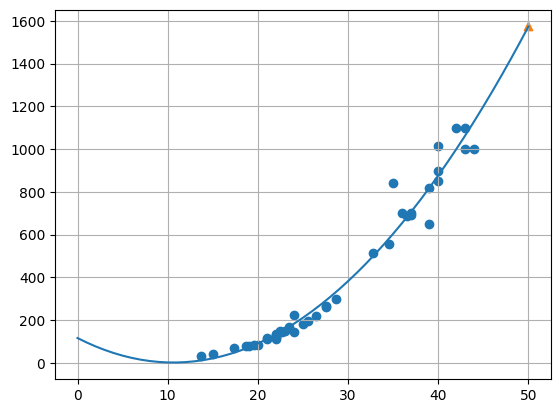

In [92]:
### 시각화하기
### 훈련데이터 산점도 시각화
plt.scatter(train_input, train_target)

### 예측하고자 하는 값의 산점도 시각화
plt.scatter(50, 1574, marker="^")

### 직선이 아닌 곡선을 그려야 하기 때문에, x축의 시작부터 끝까지의 범위 값을 사용
point = np.arange(0, 51)
### 추세선 그리기
# - 추세선은 x축 값의 시작값부터 끝값까지의 값을 이용해서 직선의 방정식을 완성해서 그리게 됩니다.
plt.plot(point, a*point**2 + b*point + c)

plt.grid()
plt.show()

In [94]:
### 과대 과소적합 확인하기
print(round(lr.score(train_poly, train_target), 3))
print(round(lr.score(test_poly, test_target), 3))

0.971
0.978


In [ ]:
"""
(해석)
 - 훈련 및 테스트 정확도(결정계수)의 결과로 볼 때
 - 과소적합이 일어나는 모델로 사용은 할 수 있으나, 
 - 과소적합을 해소할 수 있는 방법을 우선 찾아봐야 합니다.
 
(과소적합을 해소하는 방법)
 - 데이터 양을 늘리는 방법
 - 복잡도를 높이는 방법
 - 분석모델이 좀 더 집중해서 훈련을 할 수 있도록 특성을 늘리는 방법(복잡도 높이기)
   --> 특성을 늘리는 방법은 "특성 공학" 개념을 적용
   --> 특성을 늘려서 사용하는 회귀모델을 "다중회귀모델"이라고 칭함
 - 복잡도를 높이는 또 다른 방법으로 규제하는 방법이 있으며, 규제방법으로 "릿지"와 "라쏘"라는 방법을 적용함
"""

In [ ]:
"""
모델 하나를 사용하고 있는데, 어떻게 직선, 곡선의 산술식을 결정할까?
 - 특성을 하나 넣는 경우와 특성이 2개인 경우에 모델이 알아서,
 - 특성의 갯수에 맞게 산술식을 결정합니다.
 - 특성이 3개 이상인 경우에는 다중회귀모델의 산술식을 적용해서 처리합니다.
"""